    Importing the required libraries and  models

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns # Data Visualisation
from collections import Counter as c   #importing collections
from matplotlib.pyplot import plot  #importing matplotlib llibrary
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

    Feeding the model with the dataset

In [41]:
df=pd.read_csv(r'C:\Users\Prathyusha\Desktop\H1B_VISA_PREDICTION\Dataset\h1b_kaggle.csv')
df.shape

(1048575, 11)

In [42]:
# lists the five rows of the dataset
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [43]:
# Gives the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          1048575 non-null  int64  
 1   CASE_STATUS         1048575 non-null  object 
 2   EMPLOYER_NAME       1048556 non-null  object 
 3   SOC_NAME            1048564 non-null  object 
 4   JOB_TITLE           1048567 non-null  object 
 5   FULL_TIME_POSITION  1048574 non-null  object 
 6   PREVAILING_WAGE     1048571 non-null  float64
 7   YEAR                1048575 non-null  int64  
 8   WORKSITE            1048575 non-null  object 
 9   lon                 1019007 non-null  float64
 10  lat                 1019007 non-null  float64
dtypes: float64(3), int64(2), object(6)
memory usage: 88.0+ MB


     CASE_STATUS Column

In [44]:
#gives the count of each classes of case status
df.CASE_STATUS.value_counts() 

CERTIFIED              914251
CERTIFIED-WITHDRAWN     83160
WITHDRAWN               35494
DENIED                  15670
Name: CASE_STATUS, dtype: int64

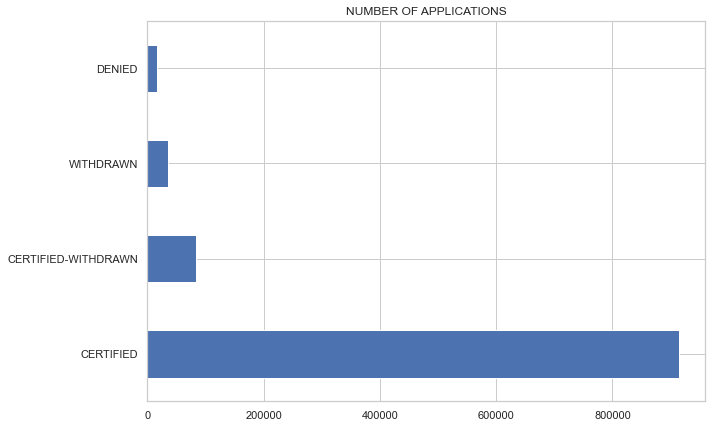

In [45]:
plt.figure(figsize=(10,7))
df.CASE_STATUS.value_counts().plot(kind='barh')
df.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

      Number of Applications per year

<AxesSubplot:>

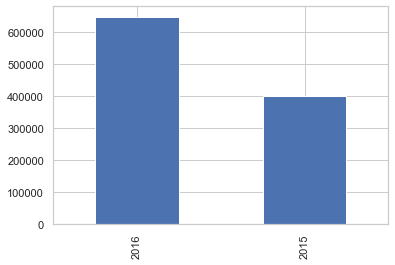

In [46]:
df.YEAR.value_counts().plot(kind = 'bar')

plt.figure(figsize=(10,7))

ax1 = df['EMPLOYER_NAME'][df['YEAR'] == 2011].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title = "Top 10 Applicants in 2016")
#ax1.set_label("")
plt.show()

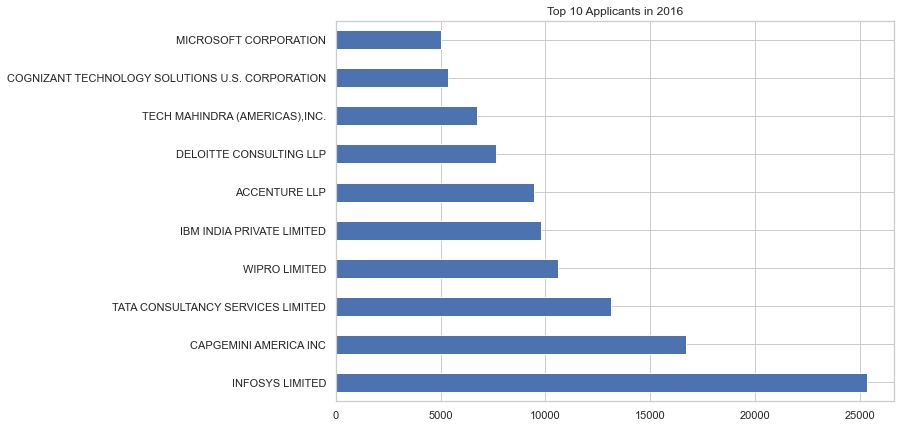

In [47]:
plt.figure(figsize=(10,7))

ax2 = df['EMPLOYER_NAME'][df['YEAR'] == 2016].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Applicants in 2016'
                                                                                                                             )
ax2.set_ylabel("")
plt.show()

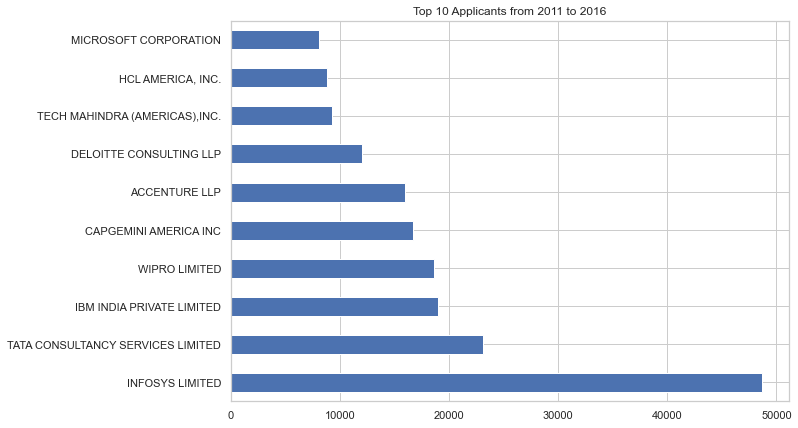

In [48]:
plt.figure(figsize=(10,7))

ax3 = df['EMPLOYER_NAME'].groupby([df['EMPLOYER_NAME']]).count().sort_values(ascending=False).head(10).plot(kind = 'barh', title = 'Top 10 Applicants from 2011 to 2016')
                                                                                                           
ax3.set_ylabel("")
plt.show()

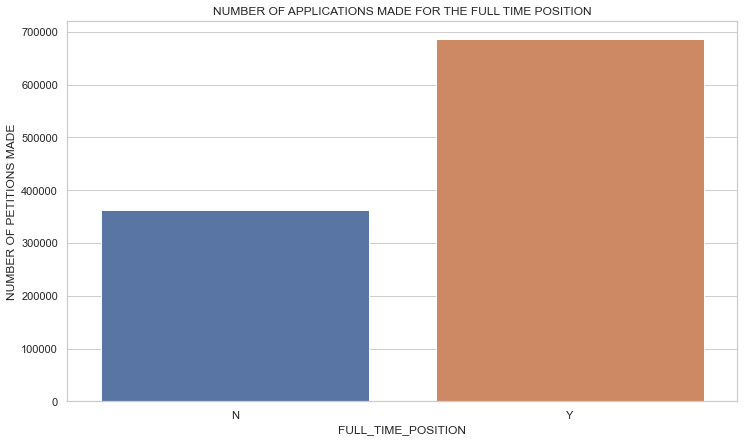

In [49]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

In [50]:
top_emp = list(df['EMPLOYER_NAME'][df['YEAR'] >= 2015].groupby(df['EMPLOYER_NAME']).count().sort_values(ascending=False).head(10).index)

byempyear = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]

byempyear = byempyear.groupby([df['EMPLOYER_NAME'], df['YEAR']])

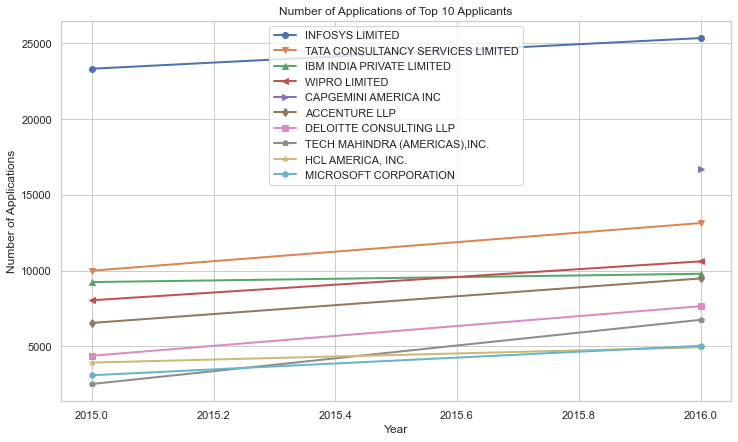

In [51]:
plt.figure(figsize=(12,7))

markers=['o','v','^','<','>','d','s','p','*','h','x','D','o','v','^','<','>','d',
         's','p','*','h','x','D']

for company in top_emp:
    tmp = byempyear.count().loc[company]
    plt.plot(tmp.index.values, tmp["PREVAILING_WAGE"].values, label=company,
             linewidth=2,marker=markers[top_emp.index(company)])
plt.xlabel("Year")
plt.ylabel("Number of Applications")
plt.legend()
plt.title('Number of Applications of Top 10 Applicants')
plt.show()

## Removing Outliers

In [52]:
df = df[df['PREVAILING_WAGE'] <= 500000]
by_emp_year = df[['EMPLOYER_NAME', 'YEAR', 'PREVAILING_WAGE']][df['EMPLOYER_NAME'].isin(top_emp)]
by_emp_year = by_emp_year.groupby([df['EMPLOYER_NAME'],df['YEAR']])

## Checking for null values

In [23]:

df.isnull().sum()

Unnamed: 0                0
CASE_STATUS               0
EMPLOYER_NAME            19
SOC_NAME                 11
JOB_TITLE                 8
FULL_TIME_POSITION        0
PREVAILING_WAGE           0
YEAR                      0
WORKSITE                  0
lon                   29557
lat                   29557
dtype: int64

In [54]:
df.isna().any()

Unnamed: 0            False
CASE_STATUS           False
EMPLOYER_NAME          True
SOC_NAME               True
JOB_TITLE              True
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
WORKSITE              False
lon                    True
lat                    True
dtype: bool

In [24]:
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])

C:\Users\Prathyusha\AppData\Local\Temp\ipykernel_3304\3128512436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])


In [55]:
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].fillna(df['FULL_TIME_POSITION'].mode()[0])

In [60]:
import math
df.math.isnan()

AttributeError: 'DataFrame' object has no attribute 'math'

## Label enconding the CASE_STATUS feature

In [26]:
df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2,'WITHDRAWN' : 3,'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4,'REJECTED' : 5, 'INVALIDATED' : 6})

C:\Users\Prathyusha\AppData\Local\Temp\ipykernel_3304\3378111941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CASE_STATUS'] = df['CASE_STATUS'].map({'CERTIFIED' : 0, 'CERTIFIED-WITHDRAWN' : 1, 'DENIED' : 2,'WITHDRAWN' : 3,'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' : 4,'REJECTED' : 5, 'INVALIDATED' : 6})


In [39]:
df.head()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
0,1,NaN,36067.0,2016,0
1,1,NaN,242674.0,2016,0
2,1,NaN,193066.0,2016,0
3,1,NaN,220314.0,2016,0
4,3,NaN,157518.4,2016,0


In [28]:
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
df.head()

C:\Users\Prathyusha\AppData\Local\Temp\ipykernel_3304\1045364823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,NaN,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,1,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,NaN,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,3,1,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,NaN,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,1,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",NaN,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
4,5,3,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,NaN,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [29]:
import sys
df['SOC_NAME1'] = 'others'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')] = 'it'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('chief','management')] = 'manager'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('mechanical')] = 'mechanical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('database')] = 'database'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('sales','market')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('financial')] = 'finance'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('public','fundraising')] = 'pr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('education','law')] = 'administrative'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('auditors','compliance')] = 'audit'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('distribution','logistics')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('recruiters','human')] = 'hr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('construction','architectural')] = 'estate'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('forencsic','health')] = 'medical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('teachers')] = 'education'

C:\Users\Prathyusha\AppData\Local\Temp\ipykernel_3304\938964257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'] = 'others'
C:\Users\Prathyusha\AppData\Local\Temp\ipykernel_3304\938964257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')] = 'it'
C:\Users\Prathyusha\AppData\Local\Temp\ipykernel_3304\938964257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

C:\Users\Prathyusha\AppData\Local\Temp\ipykernel_3304\938964257.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
C:\Users\Prathyusha\AppData\Local\Temp\ipykernel_3304\938964257.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
C:\Users\Prathyusha\AppData\Local\Temp\ipykernel_3304\938964257.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [30]:
df = df.drop(['Unnamed: 0', 'EMPLOYER_NAME', 'SOC_NAME','JOB_TITLE','WORKSITE', 'lon','lat'], axis = 1)

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.SOC_NAME1)
# print list(le.classes_)
df['SOC_N']=le.transform(df['SOC_NAME1'])

In [32]:
df = df.drop(['SOC_NAME1'], axis=1)

<AxesSubplot:>

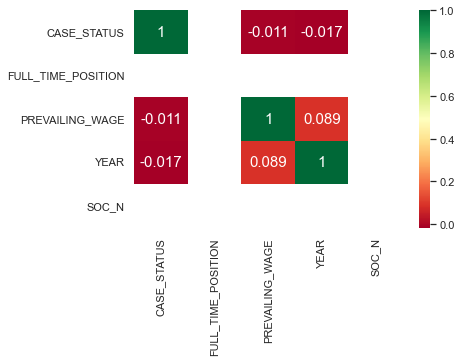

In [33]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [34]:
selcols=["FULL_TIME_POSITION","PREVAILING_WAGE","YEAR","SOC_N"]
x=pd.DataFrame(df,columns=selcols)
y=pd.DataFrame(df,columns=['CASE_STATUS'])

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [37]:
x_train.head(5)

,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,SOC_N
88130,NaN,51355.0,2016,0
411587,NaN,84906.0,2016,0
608053,NaN,41220.0,2016,0
879183,NaN,88296.0,2015,0
364656,NaN,60112.0,2016,0


##Model Fitting by using Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:

y_pred_rf =rf.predict(x_test)
print(y_pred_rf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

In [30]:
c(y_pred_rf)

Counter({0: 881754, 1: 11972, 2: 4548, 3: 1700})

In [31]:
accuracy = accuracy_score(y_test,y_pred_rf)
accuracy

0.8688517668288195

In [32]:
import pickle
pickle.dump(rf,open('Visarf.pkl','wb'))